<img src="../figures/space_torch.png" width="700" height="400">

# Tutorial: Introduction to PyTorch

Welcome to the Pytorch intro for 2024 IntroToML. The notebook is based on **[this resource](https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.html)** which contains more notebooks including implementations of very recent models. We will use common libraries such as `numpy`, `matplotlib`, `torch` and `torchvision`. If you are running this notebook on Google Colab, all libraries should be pre-installed. If you are running this notebook locally, you will need to install them yourself with, e.g., `pip`. The libraries contain functionalities for numerical computing, plotting, and deep learning.

The notebook is meant to give a short introduction to PyTorch basics, and get you setup for writing your own neural networks. PyTorch is an open source machine learning framework that allows you to write your own neural networks and optimize them efficiently. However, PyTorch is not the only framework of its kind. Alternatives to PyTorch include [TensorFlow](https://www.tensorflow.org/), [JAX](https://github.com/google/jax#quickstart-colab-in-the-cloud) and [Caffe](http://caffe.berkeleyvision.org/). We choose PyTorch due to its simplicity and since it's the one you'll be most likely to encounter in your research.



In [1]:
## Standard libraries
import numpy as np 
import pandas as pd
import time
import itertools

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
import seaborn as sns
sns.set()

/tmp/ipykernel_3165498/3403548724.py:13: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


## The Basics of PyTorch

We will start with reviewing the very basic concepts of PyTorch. As a prerequisite, we recommend to be familiar with the `numpy` package as most machine learning frameworks are based on very similar concepts. If you are not familiar with numpy yet, don't worry: here is a [tutorial](https://numpy.org/devdocs/user/quickstart.html) to go through. 

So, let's start with importing PyTorch. The package is called `torch`, based on its original framework [Torch](http://torch.ch/). As a first step, we can check its version:

In [3]:
!nvcc --version

/bin/bash: line 1: nvcc: command not found


In [2]:
import torch
print("Using torch", torch.__version__)

Using torch 2.2.0+cu121


At the time of writing this tutorial (April 2024), the current stable version is 2.2.2. You should see your version type and some extension for whether you use the cpu or gpu version. In general, it is recommended to keep the PyTorch version updated to the newest one -- however, the interface between PyTorch versions doesn't change too much, and hence all code should also be runnable with different versions.

As in every machine learning framework, PyTorch provides functions that are stochastic like generating random numbers. It's a very good practice is to setup your code to be reproducible with the exact same random numbers. This is why we set a seed below. 

In [3]:
torch.manual_seed(42) # Setting the seed



Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later).
The name "tensor" is a generalization of concepts you already know. For instance, a vector is a 1-D tensor, and a matrix a 2-D tensor. When working with neural networks, we will use tensors of various shapes and number of dimensions.

Most common functions you know from numpy can be used on tensors as well. Actually, since numpy arrays are so similar to tensors, we can convert most tensors to numpy arrays (and back) but we don't need it too often.



### Tensors

Tensors are the PyTorch equivalent to Numpy arrays, with the addition to also have support for GPU acceleration (more on that later). The name "tensor" is a generalization of concepts you already know. Brief unravelling of terminology:
- Zero-dimensional tensors (point values) -- are called scalars,
- One-dimensional tensors are called vectors,
- Higher dimensional tensors are referred to as just tensors, batches of matrices, or just high dimensional matrices -- it depends on which abstraction we want to think in.

#### Initialization

Let's first start by looking at different ways of creating a tensor. There are many possible options, the simplest one is to call `torch.Tensor` passing a scalar (point value).

 **Note:** Use `torch.tensor()` to make a tensor and not `torch.Tensor()` as the latter is the class constructure, deprecated for making tensors.

In [4]:
x = torch.tensor(5)

# zooming in on tensor properties
print(x)
print(type(x))
print(x.dtype)
print(x.shape)
print(x.device)
print(x.item())


tensor(5)
<class 'torch.Tensor'>
torch.int64
torch.Size([])
cpu
5


In this way we can analyze properties of the tensor. Let's see how you can initialize some different tensors. 

In [5]:
# list
torch.tensor([1,2,3,4,5])
# nested list 
torch.tensor([[1, 2], [3, 4]])
# tuple
torch.tensor((1,2,3,4,5))
# floats
torch.tensor([1, 2.])
# np array 
torch.tensor(np.array([1, 2.]))
# go back to numpy
torch.tensor([1, 2.]).numpy()

array([1., 2.], dtype=float32)

Notice how it's easy to convert to and from numpy arrays; this is useful for interfacing with other libraries that might not support PyTorch -- e.g., whenever you have to plot something with `matplotlib`. The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU. In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `tensor.cpu().numpy()`.

### Useful functions for initializing tensors

Now, we manually inserted the values of the tensor. However, PyTorch provides many functions to create tensors with specific values. However, there are some very useful functions for initializing tensors with specific values: 
* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.eye`: Creates a tensor with ones on the diagonal and zeros elsewhere (identity matrix)
* `torch.zeros_like`: Creates a tensor of zeros with the same shape as the input tensor
* `torch.arange`: Creates a tensor containing the values [start, start + 1, ..., end - 1]

Now, let's try! 

In [6]:
zeros = torch.zeros(2, 3)
print(zeros)

ones = torch.ones(2, 3)
print(ones)

eye = torch.eye(3)
print(eye)

torch.manual_seed(1729)
random = torch.rand(2, 2)
print(random)

zeros_like = torch.zeros_like(random)
print(zeros_like)


tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])
tensor([[0., 0.],
        [0., 0.]])


These factory methods are useful to create the matrices you want. For instance, you may want to initialize a tensor with zeros outside a loop and then progressively fill it with values during code execution.


### Random Tensors and Seeding

Speaking of the random tensor, did you notice the call to torch.manual_seed() immediately preceding it? Initializing tensors, such as a model’s learning weights, with random values is common but there are times - especially in research settings - where you’ll want some assurance of the reproducibility of your results. Manually setting your random number generator’s seed is the way to do this. Let’s look more closely:

In [7]:
torch.manual_seed(1729)
random1 = torch.rand(2, 3)
print(random1)

random2 = torch.rand(2, 3)
print(random2)

torch.manual_seed(1729)
random3 = torch.rand(2, 3)
print(random3)

random4 = torch.rand(2, 3)
print(random4)

tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])
tensor([[0.3126, 0.3791, 0.3087],
        [0.0736, 0.4216, 0.0691]])
tensor([[0.2332, 0.4047, 0.2162],
        [0.9927, 0.4128, 0.5938]])


What you should see above is that random1 and random3 carry identical values, as do random2 and random4. Manually setting the RNG’s seed resets it, so that identical computations depending on random number should, in most settings, provide identical results.

For more information, see the [PyTorch documentation on reproducibility](https://pytorch.org/docs/stable/notes/randomness.html).

### Operations on PyTorch Tensors


Most operations that exist in numpy, also exist in PyTorch. A full list of operations can be found in the [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html#), but we will review the most important ones.

In [8]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos       # addition allowed because shapes are similar
print(threes)              # tensors are added element-wise; same shape as input tensors

squares = (torch.arange(9) + 1) ** 2
print(squares)

# uncomment this line to get a runtime error: shape mismatch
# ones*squares


tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
tensor([ 1,  4,  9, 16, 25, 36, 49, 64, 81])


As you can see above, arithmetic operations between tensors and scalars, such as addition, subtraction, multiplication, division, and exponentiation are distributed over every element of the tensor. Because the output of such an operation will be a tensor, you can chain them together with the usual operator precedence rules, as in the line where we create squares.

In [9]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.mean(r), torch.std(r))
print('\nMin, max, and sum of r:')
print(torch.min(r), torch.max(r), torch.sum(r))

A random matrix, r:
tensor([[ 0.2255, -0.6961],
        [-0.9093,  0.0070]])

Absolute value of r:
tensor([[0.2255, 0.6961],
        [0.9093, 0.0070]])

Inverse sine of r:
tensor([[ 0.2275, -0.7700],
        [-1.1417,  0.0070]])

Determinant of r:
tensor(-0.6314)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.4635,  0.8861],
        [ 0.8861,  0.4635]]),
S=tensor([0.9679, 0.6524]),
V=tensor([[-0.9405, -0.3398],
        [ 0.3398, -0.9405]]))

Average and standard deviation of r:
tensor(-0.3432) tensor(0.5450)

Min, max, and sum of r:
tensor(-0.9093) tensor(0.2255) tensor(-1.3729)


Another common operation aims at changing the shape of a tensor. A tensor of size (2,3) can be re-organized to any other shape with the same number of elements (e.g. a tensor of size (6), or (3,2), ...). In PyTorch, this operation is called `view`:

In [10]:
x = torch.arange(6)
print("X", x)

X tensor([0, 1, 2, 3, 4, 5])


In [11]:
x = x.view(2, 3) # or x.view(-1, 3)
print("X", x)

X tensor([[0, 1, 2],
        [3, 4, 5]])


In [12]:
x = x.permute(1, 0) # Swapping dimension 0 and 1
print("X", x)

X tensor([[0, 3],
        [1, 4],
        [2, 5]])


Other commonly used operations include matrix multiplications, which are essential for neural networks. Quite often, we have an input vector $\mathbf{x}$, which is transformed using a learned weight matrix $\mathbf{W}$. There are multiple ways and functions to perform matrix multiplication, some of which we list below:

* `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the [documentation](https://pytorch.org/docs/stable/generated/torch.matmul.html?highlight=matmul#torch.matmul)). Can also be written as `a @ b`, similar to numpy. 
* `torch.mm`: Performs the matrix product over two matrices, but doesn't support broadcasting (see [documentation](https://pytorch.org/docs/stable/generated/torch.mm.html?highlight=torch%20mm#torch.mm))
* `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor $T$ is of shape ($b\times n\times m$), and the second tensor $R$ ($b\times m\times p$), the output $O$ is of shape ($b\times n\times p$), and has been calculated by performing $b$ matrix multiplications of the submatrices of $T$ and $R$: $O_i = T_i @ R_i$
* `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention. Explanation of the Einstein sum can be found in assignment 1.

Usually, we use `torch.matmul` or `torch.bmm`. We can try a matrix multiplication with `torch.matmul` below.

In [13]:
A = torch.arange(6).view(2, 3) #  We can also stack multiple operations in a single line
print("A", A)

A tensor([[0, 1, 2],
        [3, 4, 5]])


In [14]:
B = torch.arange(9).view(3, 3)
print("B", B)

B tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])


In [15]:
C = torch.matmul(A, B) # Verify the result by calculating it by hand too!
print("C", C)

C tensor([[15, 18, 21],
        [42, 54, 66]])


Lastly, we can use the `tensor.squeeze` and `tensor.unsqueeze` methods to either remove empty axes or add a new dimension (also possible with `tensor.view`). This is useful when you want to add a batch dimension to a single sample, or remove a singleton dimension from a tensor.


In [16]:
x = torch.ones(2,2)
print(x.shape)

x = x.unsqueeze(-1) # add a dimension at the end
print(x.shape)

x = x.view(1, 2, 1, 2, 1)
print(x.shape)

x = x.squeeze() # remove all dimensions of size 1
print(x.shape)

torch.Size([2, 2])
torch.Size([2, 2, 1])
torch.Size([1, 2, 1, 2, 1])
torch.Size([2, 2])


#### Indexing

We often have the situation where we need to select a part of a tensor. Indexing works just like in numpy, so let's try it:

In [17]:
x = torch.arange(12).view(3, 4)
print("X", x)

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [18]:
print(x[:, 1])   # Second column

tensor([1, 5, 9])


In [19]:
print(x[0])      # First row

tensor([0, 1, 2, 3])


In [20]:
print(x[:2, -1]) # First two rows, last column

tensor([3, 7])


In [21]:
print(x[1:3, :]) # Middle two rows

tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


### Learning by example: A torch look at the COVID-19 data

Next, we will take the example of the [NNintro1 tutorial](https://github.com/Center-for-Health-Data-Science/IntroToML/blob/main/Day2/CoronaData.ipynb) and implement it using PyTorch. We will see how PyTorch can automatically compute gradients for us, which is a key feature of PyTorch.

We'll use the download script from earlier to get the data. Uncomment it if you need to get it again.

In [22]:
# %%bash
# rm -f owid-covid-data.csv*
# wget -q 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
# head -1 owid-covid-data.csv > Covid_Denmark.csv
# grep -i denmark owid-covid-data.csv >> Covid_Denmark.csv
# rm -f owid-covid-data.csv # remove the larger file

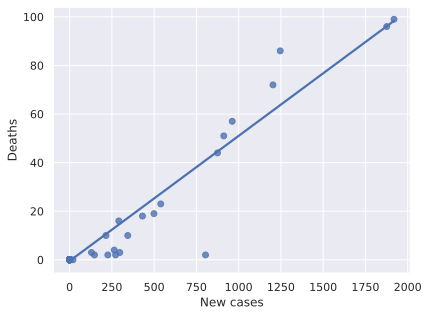

In [23]:
# load and apply same filtering as before
df = pd.read_csv('Covid_Denmark.csv',parse_dates=['date'])

t1 = pd.to_datetime("03-01-2020")
t2 = pd.to_datetime("08-01-2020")

dfe = df[(df['date']>t1) & (df['date']<t2) & df['new_cases'].notna() & df['new_deaths'].notna()]
x = (dfe['new_cases']*1.0).to_numpy()
y = (dfe['new_deaths']*1.0).to_numpy()

sns.regplot(x=x,y=y,ci=None).set(xlabel='New cases',ylabel='Deaths')
plt.show()

# convert x, y to tensors
x = torch.tensor(x).float()
y = torch.tensor(y).float()

Last time, we manually differentiated the mean squared error function w.r.t. two variables $a$ and $b$, resulting in:
$$
\left(\frac{\partial E}{\partial a},\frac{\partial E}{\partial b}\right)
= \left( \frac{2}{n} \sum_i(ax_i+b-y_i)x_i,
\frac{2}{n}\sum_i(ax_i+b-y_i) \right)
$$

This may work for very easy functions, but it quickly gets difficult. Now, we'll use PyTorch to avoid any thinking!


In [24]:
# our linear function 
def model(x, a, b): 
    return a*x + b

# define a, b as trainable parameters
a = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

# define loss and optimization algorithm
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD([a, b], lr=1e-6) # be careful with lr; loss easily explodes

/home/fvk220/fvk220/.venv/lib64/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 0, Loss 270.4144592285156
Epoch 3, Loss 88.38042449951172
Epoch 6, Loss 38.09589385986328
Epoch 9, Loss 24.205432891845703
Epoch 12, Loss 20.368375778198242
Epoch 15, Loss 19.30843734741211
Epoch 18, Loss 19.01563835144043


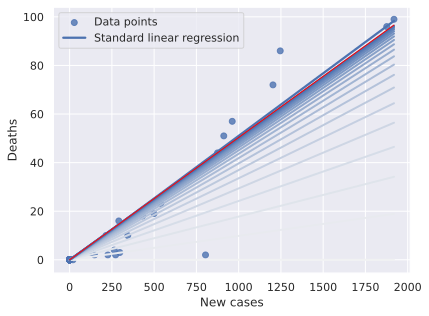

tensor(0.0504, requires_grad=True) tensor(2.8155e-05, requires_grad=True)


In [25]:
n_epochs = 20
palette  = itertools.cycle(sns.light_palette(sns.color_palette()[0],n_epochs))

plot = sns.regplot(x=x.numpy(),y=y.numpy(),ci=None).set(xlabel='New cases',ylabel='Deaths')
plt.legend(labels=['Data points','Standard linear regression'])

# fit to the data
for epoch in range(n_epochs):
    # Step 1: Reset the parameter gradients
    # This is necessary because by default, gradients are _accumulated_ (i.e, not overwritten) whenever .backward() is called
    optimizer.zero_grad()

    # Step 2: Compute the model's predictions and the loss
    y_pred = model(x, a, b)
    loss = loss_fn(y, y_pred)

    # Step 3: Compute the gradients with backpropagation
    loss.backward()

    # Step 4: Update the model's parameters
    optimizer.step()

    # Plot and print progress
    plt.plot(x, y_pred.detach().numpy(), color=next(palette), linewidth=2)

    if epoch % 3 == 0: # loss stats
        print(f'Epoch {epoch}, Loss {loss.item()}')


plt.plot(x,model(x,a,b).detach().numpy(), color='red', linewidth=1)
plt.show()
print(a, b)

## How can we make a more generally usable solution?
Let's rewrite the code in order to:
- Better match the networks you'll make in the following tutorials,
- Handle large datasets that don't fit in memory.
- Enable the use of GPUs.

First, let's see how to define the regression like a neural network. 

### Defining the model

`torch.nn` provides useful classes to define neural networks. In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. The basic template of a module is as follows:

In [26]:
class MyModule(torch.nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

The forward function is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the init function, we usually create the parameters of the module, using `nn.Parameter`, or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overwritten as well if wanted. Now let's adapt our linear regression to this template.

In [27]:
# Linear network in a torch NN-style
class LinearNetwork(torch.nn.Module): # networks always inherit from torch.nn.Module 

    # define the layers in __init__
    def __init__(self):
        super().__init__() # needs to be here for API reasons (calls the parent Module.__init__) 
        self.linear_layer = torch.nn.Linear(1, 1) # layer which applies a linear transformation to incoming data: y = xA^T + b

    # forward pass is applied when you call the model with input data
    def forward(self, x): 
        x = self.linear_layer(x) # apply the linear 
        # apply more layers here 
        return x 

# create an instance of the model
model = LinearNetwork()
print(model)

LinearNetwork(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)


In [28]:
# Another common way to write the network is as a sequential module.
model2 = torch.nn.Sequential(
    torch.nn.Linear(1, 1),
    # add more layers here
)
print(model2)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)


Alternatively, we could have defined a `torch.nn.Parameter` for both $a$ and $b$, but you should get used to seeing PyTorch network layers. 

In this toy case, the normal model print gives a good idea about the model. For more complex models, you can use `torchinfo` to get a more detailed overview of the model [(documentation)](https://github.com/TylerYep/torchinfo):

In [29]:
from torchinfo import summary

summary(model, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
LinearNetwork                            [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### Loading data

Next, we'll seek to apply the `DataLoader` class to handle the data [(documentation)](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader). This class allows us to iterate over the data in batches, shuffles the data for us, and can efficiently load the data in parallel to the training loop.

In order to use the dataloader effortlessly, we need to define our data as a `torch.utils.data.Dataset`. Your custom dataset should inherit `Dataset` and specify two functions: `__getitem__`, and `__len__`. The get-item function has to return the $i$-th data point in the dataset, while the len function returns the size of the dataset. For the COVID-19 dataset, we can define the dataset class as follows:

In [30]:
from torch.utils.data import Dataset

class CovidDataset(Dataset):
    """This is a child of Dataset providing the data to the dataloader;
    The init and getitem constructors are absolutely necessary"""
    def __init__(self, x, y):
        super().__init__()
        self.data = x.unsqueeze(1) # add extra dimension to get (N, 1) shape necessary for the model
        self.targets = y.unsqueeze(1)
    
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        return self.data[idx], self.targets[idx]

# Create a dataset and inspect it
dataset = CovidDataset(x, y)
print("Size of dataset:", len(dataset))
print("First data point:", dataset[0])

Size of dataset: 152
First data point: (tensor([0.]), tensor([0.]))


Now, we can easily make a `torch.utils.data.DataLoader` instance. This is an iterable object that returns batches of data. In contrast to the dataset class, we usually don't have to define our own data loader class, but can just create an object of it with the dataset as input. Additionally, we can configure our data loader with the following input arguments (only a selection, see full list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.

In [31]:
from torch.utils.data import DataLoader

data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# next(iter(...)) catches the first batch of the data loader
# If shuffle is True, this will return a different batch every time we run this cell
# For iterating over the whole dataset, we can simple use "for batch in data_loader: ..."
data_inputs, data_targets = next(iter(data_loader))

# The shape of the outputs are [batch_size, d_1,...,d_N] where d_1,...,d_N are the
# dimensions of the data point returned from the dataset class
print("Data inputs", data_inputs.shape, "\n", data_inputs, "\n")
print("Data labels", data_targets.shape, "\n", data_targets)

Data inputs torch.Size([16, 1]) 
 tensor([[  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [272.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.],
        [  0.]]) 

Data labels torch.Size([16, 1]) 
 tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [2.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])


Now, we have prepared a dataloader! In case you have validation and test sets too, you can create multiple data loaders. These are usually not shuffled.

### Using the GPU

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. 

GPUs can accelerate the training of your network up to a factor of which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries CUDA and cuDNN). First, let’s check whether you have a GPU available:

In [32]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

Is the GPU available? True


If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. Change it if necessary; seek support from ChatGPT or Stack Overflow. On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under Runtime -> Change runtime type).

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let’s try it below. We can specify the device as follows:

In [33]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Device cuda


Now let’s create a tensor and push it to the device:

In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have large networks to train. We can compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU.
_Note: torch.cuda.Event may err if you have an old PyTorch version_.

In [34]:
samples = torch.randn(5000, 5000)

# -- CPU version -- 
start_time = time.time()
_ = torch.matmul(samples, samples)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

# -- GPU version -- 
samples = samples.to(device)
_ = torch.matmul(samples.T, samples.T)  # First operation to 'burn in' GPU
# CUDA is asynchronous, so we need to use different timing functions
try:
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)
    start.record()
    _ = torch.matmul(samples, samples)
    end.record()
    torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds
except TypeError as e:
    # catch the message from the error: likely no gpu available or old torch version
    print("CUDA error:", e)


CPU time: 0.08485s
GPU time: 0.03936s


### Collecting all the pieces

Now, we know about NN modules, dataloaders and CPU/GPU devices. Let's put it all together in a modified training loop. 

Using device cuda


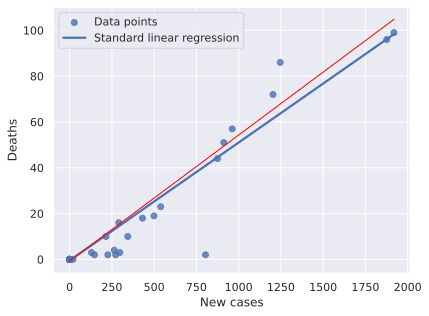

tensor(0.0504, requires_grad=True) tensor(2.8155e-05, requires_grad=True)


In [35]:
n_epochs = 80
palette  = itertools.cycle(sns.light_palette(sns.color_palette()[0],n_epochs))

plot = sns.regplot(x=dataset.data.numpy(),y=dataset.targets.numpy(),ci=None).set(xlabel='New cases',ylabel='Deaths')
plt.legend(labels=['Data points','Standard linear regression'])

print("Using device", device)
model = LinearNetwork().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-6)

model.to(device)
for epoch in range(n_epochs):
    for data, targets in data_loader:
        # New step 0: 
        data, targets = data.to(device), targets.to(device)

        # Step 1: Reset the parameter gradients
        # This is necessary because by default, gradients are _accumulated_ (i.e, not overwritten) whenever .backward() is called
        optimizer.zero_grad()

        # Step 2: Compute the model's predictions and the loss
        y_pred = model(data)
        loss = loss_fn(targets, y_pred)

        # Step 3: Compute the gradients with backpropagation
        loss.backward()

        # Step 4: Update the model's parameters
        optimizer.step()


plt.plot(x, model(dataset.data.to(device)).detach().cpu().numpy(), color='red', linewidth=1)
plt.show()
print(a, b)

## For the curious: Dynamic computation graph and backprop

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 
PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, to recap: the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

> **Note:  Why do we want gradients?** Consider that we have defined a function, a neural net, that is supposed to compute a certain output $y$ for an input vector $\mathbf{x}$. We then define an **error measure** that tells us how wrong our network is; how bad it is in predicting output $y$ from input $\mathbf{x}$. Based on this error measure, we can use the gradients to **update** the weights $\mathbf{W}$ that were responsible for the output, so that the next time we present input $\mathbf{x}$ to our network, the output will be closer to what we want.

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [36]:
x = torch.ones((3,))
print(x.requires_grad)

False


We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [37]:
x.requires_grad_(True)
print(x.requires_grad)

True


In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{\ell(x)}\sum_i \left[(x_i + 2)^2 + 3\right],$$

where we use $\ell(x)$ to denote the number of elements in $x$. In other words, we are taking a mean here over the operation within the sum. You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [38]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

X tensor([0., 1., 2.], requires_grad=True)


Now let's build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [39]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Y tensor(12.6667, grad_fn=<MeanBackward0>)


Using the statements above, we have created a computation graph that looks similar to the figure below:

<div style="text-align: center;">
    <img src="../figures/pytorch_computation_graph.svg" width="225px">
</div>

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.
Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [40]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [41]:
print(x.grad)

tensor([1.3333, 2.0000, 2.6667])


We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.